# Read CSV & Basic description of dataset

In [1]:
### Read data and get info ####
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics


In [2]:
df = pd.read_csv("/Users/thamjayshen/Downloads/Data Analyst Case Studies/CSIT Superstore/superstore.csv")    #pd.read_csv('superstore.csv')
print("Dataframe Shape", df.shape)
df.head()

Dataframe Shape (51290, 24)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
df.dtypes #check for data type in each column


row_id              int64
order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_id        object
customer_name      object
segment            object
city               object
state              object
country            object
postal_code       float64
market             object
region             object
product_id         object
category           object
sub-category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
dtype: object

In [4]:
df.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub-category    51290 non-null  object 
 17  product_name    51290 non-null 

In [5]:
df.isnull().sum() #total sum of null values in df

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub-category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

# Part 1 Are there regular customers?


In [6]:
#total number of unique customers
len(df["customer_id"].unique())

1590

In [7]:
#group customers by their id
new_df = df.groupby("customer_id").sum()

In [8]:
#sort the customers according to their profit
new_df.sort_values(by = "profit", ascending = False).head(n=20)

,row_id,postal_code,sales,quantity,discount,profit,shipping_cost
customer_id,,,,,,,
TC-20980,1074794,586036.0,34218.26900,209,6.552,8787.47490,2020.81
RB-19360,1497896,914035.0,29197.63460,248,4.820,8523.95150,2006.56
SC-20095,1285853,1671032.0,25602.61000,214,6.440,8106.21790,2161.03
BE-11335,1535778,369095.0,27158.01840,398,5.822,7790.69630,2566.55
HL-15040,960823,646404.0,29664.23058,199,5.642,7657.50178,1932.39
AB-10105,1408244,1359311.0,22966.78000,222,11.900,6912.61450,2465.01
SP-20920,1204113,775018.0,28124.21286,222,7.302,6649.62626,2408.67
HM-14860,1811605,1199523.0,27434.16760,307,13.530,6544.88640,2327.34
TA-21385,1161514,375032.0,35668.12080,239,5.210,6274.98910,2449.87


In [9]:
# Look at the frequency the customer appears 
df["customer_id"].value_counts()

PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
MY-18295    85
            ..
MG-7650      1
MG-7890      1
DK-2985      1
ZC-11910     1
BG-1035      1
Name: customer_id, Length: 1590, dtype: int64

In [10]:
ran_df = pd.DataFrame(df["customer_id"].value_counts())

In [11]:
ran_df.rename(columns = {"customer_id":"frequency"}, inplace = True)
ran_df.head()

,frequency
PO-18850,97
BE-11335,94
JG-15805,90
SW-20755,89
MY-18295,85


In [12]:
reg_customer_df = new_df.join(ran_df, lsuffix='_caller', rsuffix='_other')

In [13]:
#Unique customers sorted by their frequency first, then profits generated
sorted_df = reg_customer_df.sort_values(by = ["frequency","profit"], ascending = False).head(n=5)

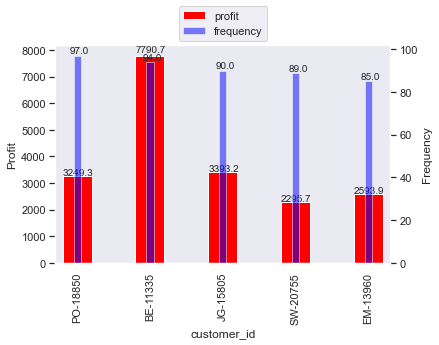

In [14]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

#Plotting out each bar chart
p1 = sorted_df.profit.plot(kind='bar', color='red', ax=ax, width=0.4)
p2 = sorted_df.frequency.plot(kind='bar', color='blue', ax=ax2, width=0.1,alpha = 0.5)

#Set label for the dual axis
ax.set_ylabel('Profit')
ax2.set_ylabel('Frequency')

#Obtain the legend handles --> Need this code to get the legend labels
values, labels = ax.get_legend_handles_labels()
values2, labels2 = ax2.get_legend_handles_labels()

#Plot the legend --> Have to adjust the bbox_to_anchor manually
ax2.legend(values + values2, labels + labels2, bbox_to_anchor =(0.5, 1.1), loc = 'center')

#Remove the gridlines in the plot
ax.grid(False)
ax2.grid(False)

#Plot values on top of the bar
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()*1.015))

for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()-0.05, p.get_height()*1.01))



plt.show()

Text(0.5, 1.0, 'Top 5 Customer frequencies')

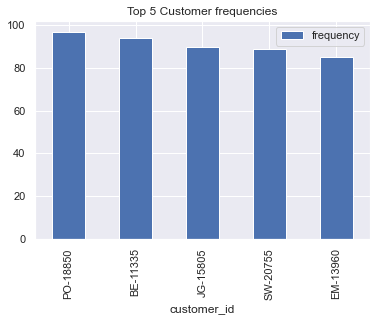

In [15]:
reg_customer_df.sort_values(by = ["frequency","profit"], ascending = False).head(n=5)["frequency"].plot.bar(legend = True)
plt.title("Top 5 Customer frequencies")

In [16]:
#unique customers sorted by their profits
sorted_df = reg_customer_df.sort_values(by = ["profit"], ascending = False).head(n=5)
sorted_df

,row_id,postal_code,sales,quantity,discount,profit,shipping_cost,frequency
customer_id,,,,,,,,
TC-20980,1074794,586036.0,34218.26900,209,6.552,8787.47490,2020.81,59
RB-19360,1497896,914035.0,29197.63460,248,4.820,8523.95150,2006.56,65
SC-20095,1285853,1671032.0,25602.61000,214,6.440,8106.21790,2161.03,53
BE-11335,1535778,369095.0,27158.01840,398,5.822,7790.69630,2566.55,94
HL-15040,960823,646404.0,29664.23058,199,5.642,7657.50178,1932.39,47


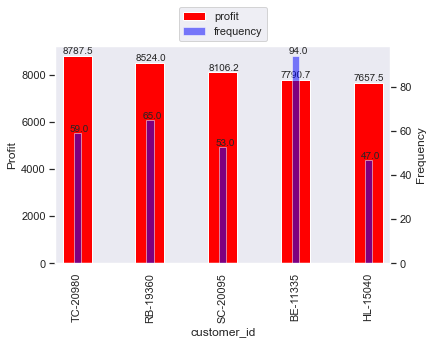

In [17]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

#Plotting out each bar chart
p1 = sorted_df.profit.plot(kind='bar', color='red', ax=ax, width=0.4)
p2 = sorted_df.frequency.plot(kind='bar', color='blue', ax=ax2, width=0.1,alpha = 0.5)

#Set label for the dual axis
ax.set_ylabel('Profit')
ax2.set_ylabel('Frequency')

#Obtain the legend handles --> Need this code to get the legend labels
values, labels = ax.get_legend_handles_labels()
values2, labels2 = ax2.get_legend_handles_labels()

#Plot the legend --> Have to adjust the bbox_to_anchor manually
ax2.legend(values + values2, labels + labels2, bbox_to_anchor =(0.5, 1.1), loc = 'center')

#Remove the gridlines in the plot
ax.grid(False)
ax2.grid(False)

#Plot values on top of the bar
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()*1.01))

for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()-0.05, p.get_height()*1.01))



plt.show()

There are Regular Customers with the top five frequencies of 97,94, 90, 89, 85.
However, their profits is around the range of 2k to 3k, except for Customer ID: BE-11335 with a profit of around 7.8k. This is contrastingly low compared to the top 5 highest profits ranging from 7.5k to 8.8k.  	

# Part 2 Which product sub categories are responsible for most negative profit from sales?

[Text(0, 0, '6152 (12%)'),
 Text(0, 0, '5059 (10%)'),
 Text(0, 0, '4883 (10%)'),
 Text(0, 0, '3538 (7%)'),
 Text(0, 0, '3434 (7%)'),
 Text(0, 0, '3357 (7%)'),
 Text(0, 0, '3170 (6%)'),
 Text(0, 0, '3075 (6%)'),
 Text(0, 0, '2606 (5%)'),
 Text(0, 0, '2435 (5%)'),
 Text(0, 0, '2425 (5%)'),
 Text(0, 0, '2420 (5%)'),
 Text(0, 0, '2411 (5%)'),
 Text(0, 0, '2223 (4%)'),
 Text(0, 0, '1755 (3%)'),
 Text(0, 0, '1486 (3%)'),
 Text(0, 0, '861 (2%)')]

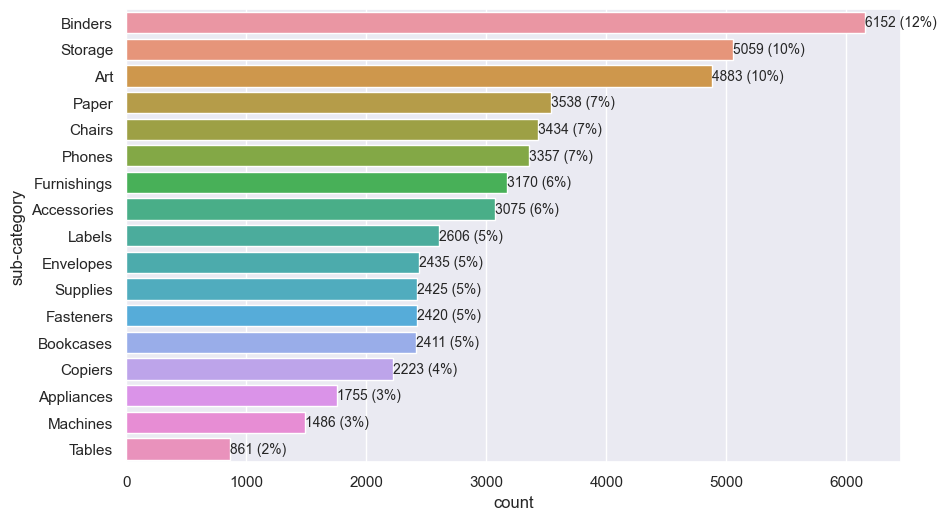

In [18]:
## This cat plot is just to see the counts of orders placed for each category. This is different from the total quantity sold from each category
#Get cat plot with labels
plt.figure(figsize=(10, 6), dpi=100) #Adjust the size of the plot

ax = sb.countplot(y=df['sub-category'], order=df['sub-category'].value_counts(ascending=False).index); #if want horizontal y=df['sub-category'], else vertical is x=df['sub-category']

#Defining labels
abs_values = df['sub-category'].value_counts(ascending=False).values
rel_values = df['sub-category'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

#Plot labels
ax.bar_label(container=ax.containers[0], labels=lbls)


Text(0.5, 1.0, 'Total Quantity Sold per Sub-category')

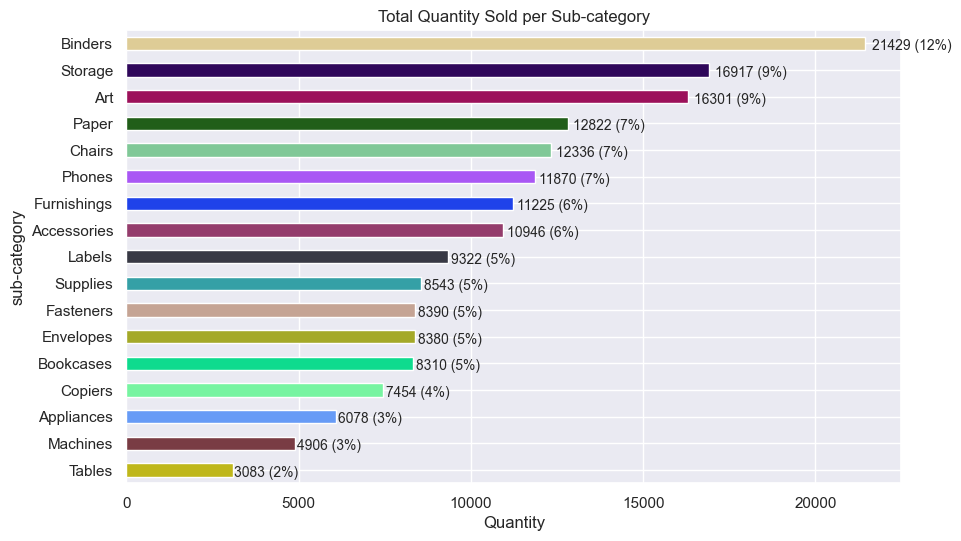

In [19]:
#Plotting Horizontal bar plots of Quantity for each Sub-Category
import random
quantity_df = df.groupby("sub-category").sum().sort_values(by = "quantity")
plt.figure(figsize=(10, 6), dpi=100) #Adjust the size of the plot
no_of_colors= len(quantity_df) #Number of colors needed
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)] #Generate a list of colors
ax = quantity_df.quantity.plot.barh(color = color); #if want horizontal y=df['sub-category'], else vertical is x=df['sub-category']
abs_values = quantity_df['quantity'].values
rel_values = 100*quantity_df['quantity'].values/quantity_df['quantity'].values.sum()
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
for index, p in enumerate(ax.patches):
   ax.annotate('{}'.format(lbls[index]), (p.get_width()*1.01, p.get_y()))


ax.set_xlabel('Quantity')

plt.title("Total Quantity Sold per Sub-category")


Text(0.5, 1.0, 'Total Profit per Sub-category')

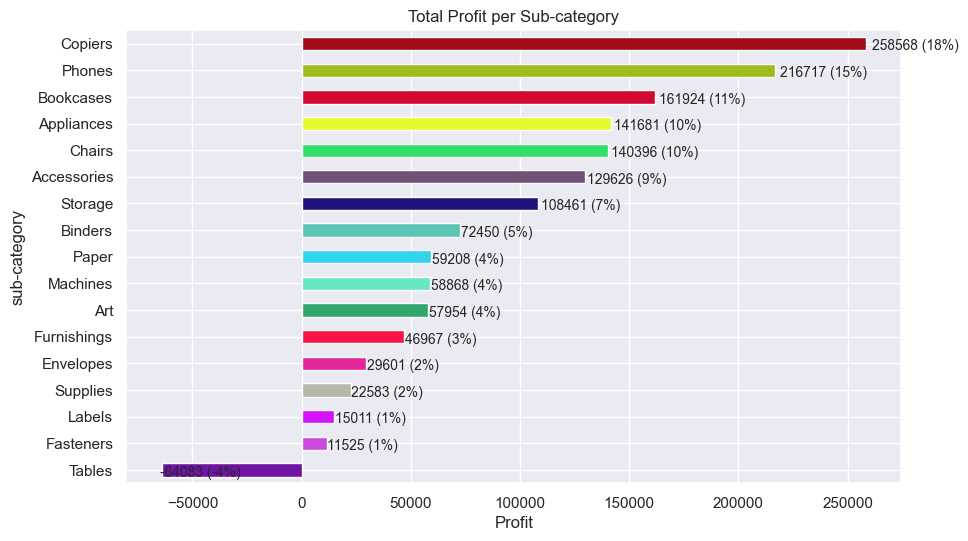

In [20]:
#Get the dataframe grouped by sub-cateogry and sorted by profit
profit_df = df.groupby("sub-category").sum().sort_values(by = "profit")

#Plotting Horizontal bar plots of Profits for each Sub-Category
plt.figure(figsize=(10, 6), dpi=100) #Adjust the size of the plot
no_of_colors= len(profit_df) #Number of colors needed
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)] #Generate a list of colors
ax = profit_df.profit.plot.barh(color = color); #if want horizontal y=df['sub-category'], else vertical is x=df['sub-category']
abs_values = profit_df['profit'].values
rel_values = 100*profit_df['profit'].values/profit_df['profit'].values.sum()
lbls = [f'{p[0]:.0f} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
for index, p in enumerate(ax.patches):
   ax.annotate('{}'.format(lbls[index]), (p.get_width()*1.01, p.get_y()))


ax.set_xlabel('Profit')

plt.title("Total Profit per Sub-category")




Text(0.5, 1.0, 'Profit & Quantity Plots per Sub-category')

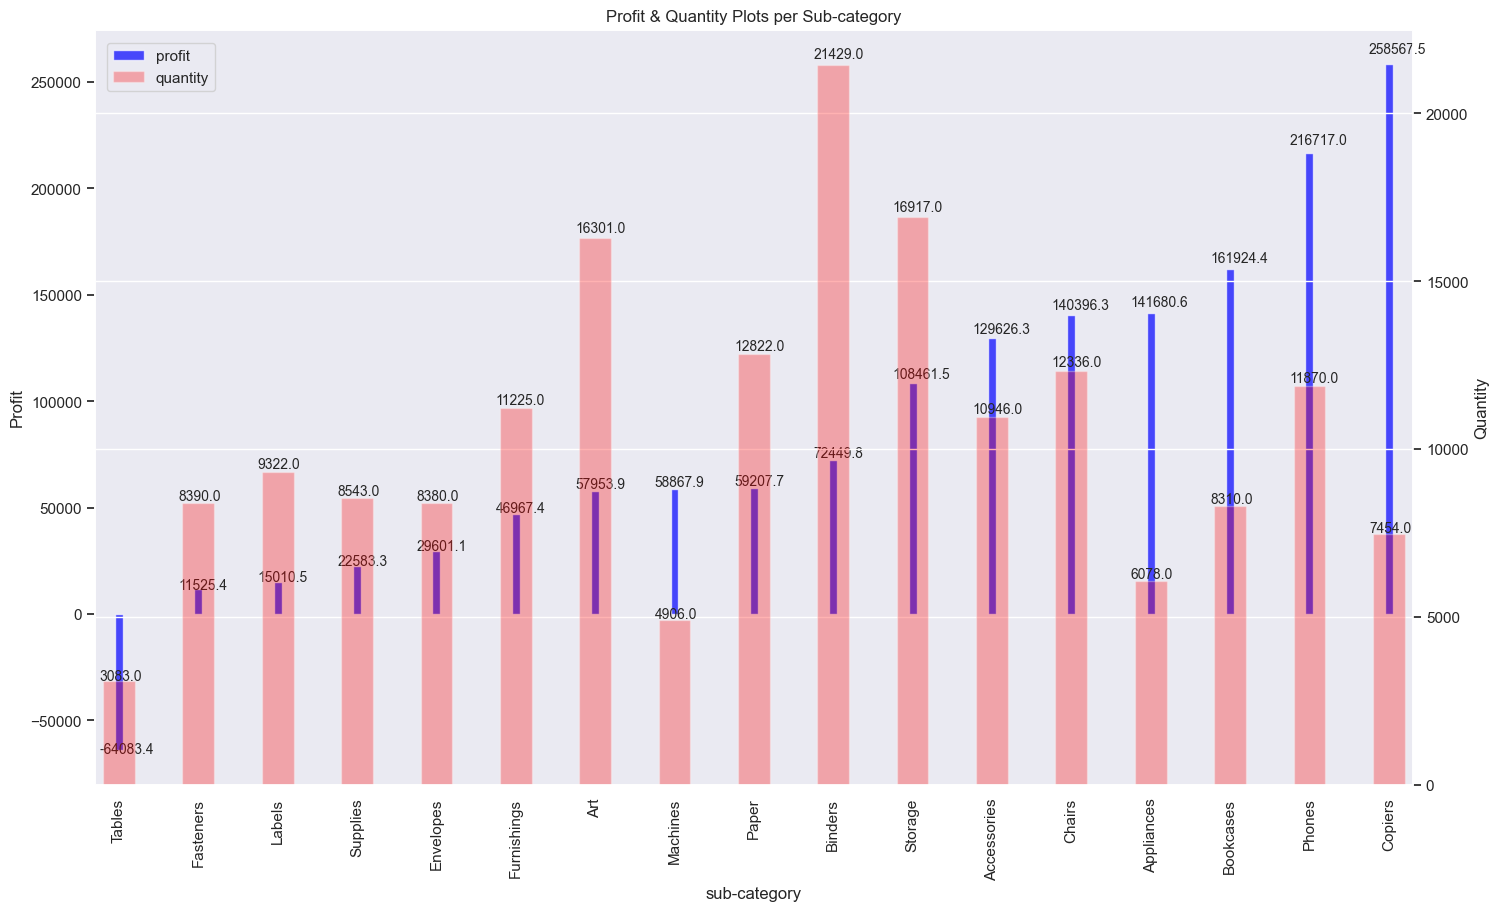

In [21]:
#Obtain Profit & Quantity Plots per Sub-category i.e. combining the 2 bar charts above together
fig = plt.figure(figsize=(17, 10), dpi=100) # Create matplotlib figure

ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

p1 = profit_df.quantity.plot.bar(color='red', ax=ax2, width=0.4, alpha = 0.3); #if want horizontal y=df['sub-category'], else vertical is x=df['sub-category']
p2 = profit_df.profit.plot.bar(color='blue', ax=ax, width=0.1,alpha = 0.7)


#Set label for the dual axis
ax.set_ylabel('Profit')
ax2.set_ylabel('Quantity')

values, labels = ax.get_legend_handles_labels()
values2, labels2 = ax2.get_legend_handles_labels()

#Plot the legend --> Have to adjust the bbox_to_anchor manually
ax2.legend(values + values2, labels + labels2, bbox_to_anchor =(0.05, 0.95), loc = 'center')

#Remove the gridlines in the plot
ax.grid(False)


#Plot values on top of the bar
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()-0.2, p.get_height()*1.02)) #if the bar is horizontal use this code: ax.annotate('{}'.format(lbls[index]), (p.get_width()*1.01, p.get_y()))

for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()-0.05, p.get_height()*1.01))

#axis title
plt.title('Profit & Quantity Plots per Sub-category')

The Tables sub-category are responsible for the most negative profits of around -64k. It can also be observed that tables also sold the least quantity

# Part 3 Is there any trend with regard to how different product categories sell over time?

[Text(0, 0, '31273 (61%)'),
 Text(0, 0, '10141 (20%)'),
 Text(0, 0, '9876 (19%)')]

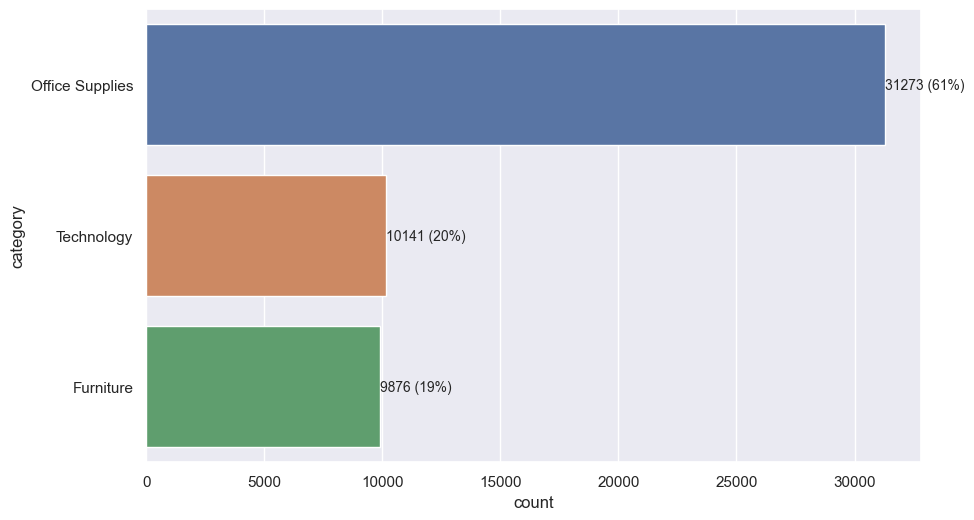

In [22]:
#Get counts of each category
plt.figure(figsize=(10, 6), dpi=100) #Adjust the size of the plot

ax = sb.countplot(y=df['category'], order=df['category'].value_counts(ascending=False).index); #if want horizontal y=df['sub-category'], else vertical is x=df['sub-category']
abs_values = df['category'].value_counts(ascending=False).values
rel_values = df['category'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)




          category       
quantity  Office Supplies    108182
          Technology          35176
          Furniture           34954
dtype: int64


array([<AxesSubplot:ylabel='None'>], dtype=object)

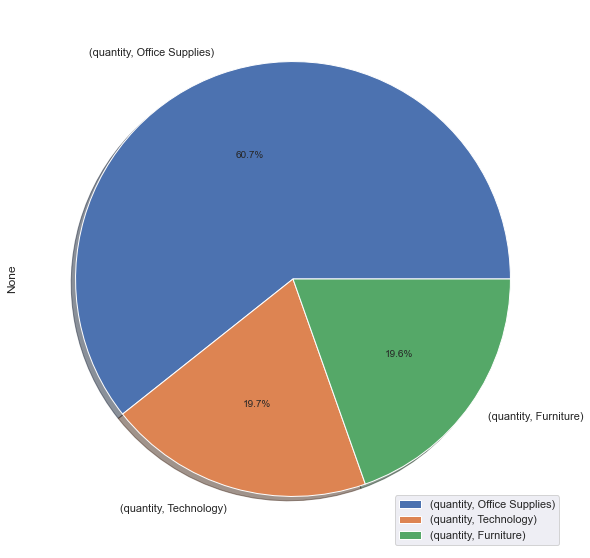

In [23]:
#Percentage of quantity sold in each category
new_df = pd.DataFrame(df[["category","quantity"]])
new_df = new_df.groupby(['category']).sum().unstack().sort_values(ascending = False)
print(new_df)
new_df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%', shadow = True,legend=True) #The explode might need to change depending on how many field u have

In [ ]:
#Convert dataframe order_date column to datetime format
df["order_date"] = pd.to_datetime(df['order_date']) 

#Create new date_df dataframe for our analysis
date_df = df.groupby(["order_date","category"]).quantity.sum() #We have to first group the same dates together and by category first in order to tabulate the mean quantity sold for each day
date_df = pd.DataFrame(date_df)
date_df = date_df.reset_index()

#Adding the additional date columns
date_df["Year"] = date_df["order_date"].apply(lambda x: x.year)
date_df["Month"] = date_df["order_date"].apply(lambda x: x.month)
date_df["Day"] = date_df["order_date"].apply(lambda x: x.day)
date_df["Day_of_Week"] = date_df["order_date"].apply(lambda x: x.isoweekday()) #Monday is 1 and Sunday is 7


In [25]:
date_df

,order_date,category,quantity,Year,Month,Day,Day_of_Week
0,2011-01-01,Furniture,5,2011,1,1,6
1,2011-01-01,Office Supplies,14,2011,1,1,6
2,2011-01-02,Furniture,8,2011,1,2,7
3,2011-01-02,Office Supplies,42,2011,1,2,7
4,2011-01-02,Technology,4,2011,1,2,7
...,...,...,...,...,...,...,...
4079,2014-12-30,Office Supplies,165,2014,12,30,2
4080,2014-12-30,Technology,39,2014,12,30,2
4081,2014-12-31,Furniture,34,2014,12,31,3
4082,2014-12-31,Office Supplies,129,2014,12,31,3


## Looking at Day of Week and quantity sold within each category

                  quantity                                              \
Day_of_Week              1          2          3          4          5   
category                                                                 
Furniture        28.970000  28.705000  27.393035  26.840796  31.215000   
Office Supplies  85.710145  88.507317  84.159420  86.394231  89.612745   
Technology       28.653659  30.850000  27.574257  28.480198  28.840796   

                                       
Day_of_Week              6          7  
category                               
Furniture        20.867347  16.185185  
Office Supplies  57.531707  38.587571  
Technology       19.061224  17.242424  


array([<AxesSubplot:ylabel='(quantity, 1)'>,
       <AxesSubplot:ylabel='(quantity, 2)'>,
       <AxesSubplot:ylabel='(quantity, 3)'>,
       <AxesSubplot:ylabel='(quantity, 4)'>,
       <AxesSubplot:ylabel='(quantity, 5)'>,
       <AxesSubplot:ylabel='(quantity, 6)'>,
       <AxesSubplot:ylabel='(quantity, 7)'>], dtype=object)

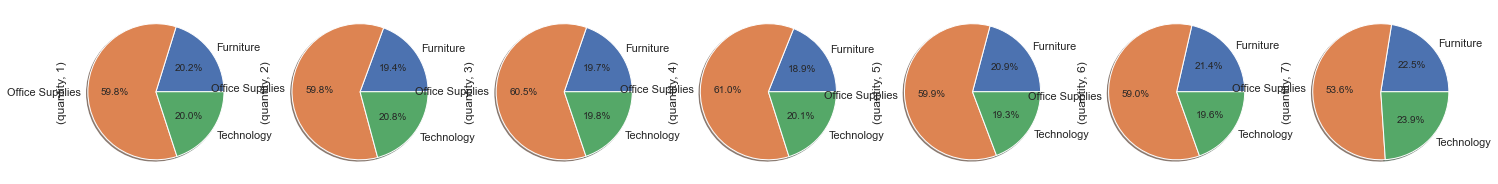

In [26]:
#Proportion of quantity sold in each category for each day in a week
dow_df = pd.DataFrame(date_df[["category","Day_of_Week","quantity"]])
dow_df = dow_df.groupby(['category',"Day_of_Week"]).mean().unstack() #Average quantities sold per day
print(dow_df)
dow_df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%', shadow = True,legend=False) #The explode might need to change depending on how many field u have


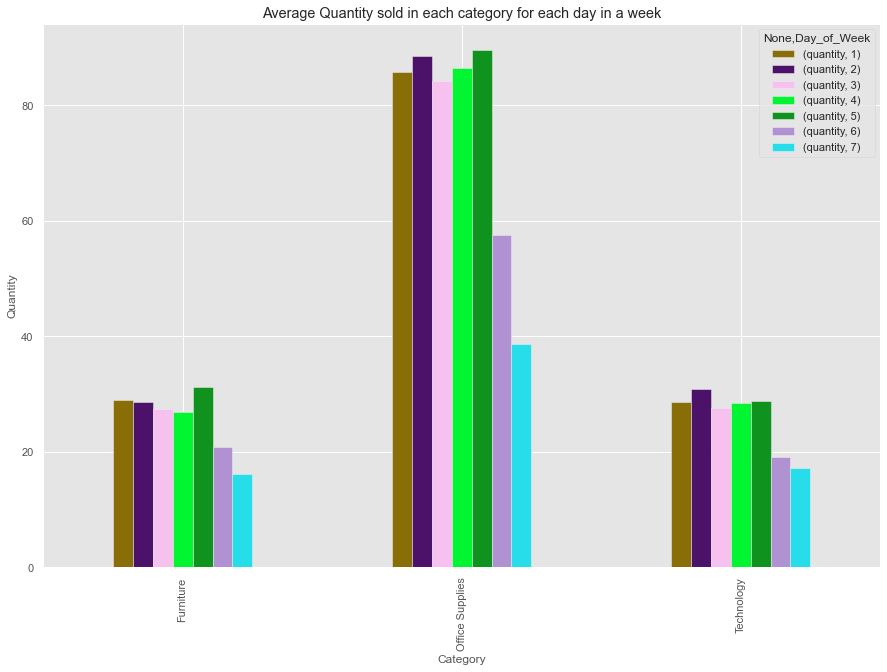

In [27]:
#Bar chart for actual quantity in each day of week
plt.style.use('ggplot')

no_of_colors= 7
colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)]
dow_df.plot.bar(legend=True, figsize=(15,10), color=colors) #note that the outside . is the 2nd group by variable ‘Married’
plt.title('Average Quantity sold in each category for each day in a week')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

From pie chart, it is observed that proportion of quantity sold within each category for every day in a week remains relatively constant, apart from sunday where office supplies sells proportionately lesser as compared to other days of the week.

In the bar plot, we can observe that for Furniture & Office supplies, Friday sells the most quantity, whereas technology category sells most quantity on tuesdays. Across all categories, weekends (Saturday and Sundays) tend to sell less quantities on average. Most probably due to people not working. 

**Additional value added work: Will be good if can plot year-on-year how each average quantity sold for each day of weak within each category varies. (Is it increasing or decreasing?)

## Looking at Month and quantity sold within each category

                  quantity                                              \
Month                   1          2          3          4          5    
category                                                                 
Furniture        17.929204  19.900990  23.672897  22.536364  22.767857   
Office Supplies  56.266667  55.336538  68.372881  63.719298  70.860656   
Technology       17.765766  21.274510  22.128440  22.540541  23.491071   

                                                                        \
Month                   6          7          8          9          10   
category                                                                 
Furniture        28.900901  20.684685  28.389381  32.419643  28.089286   
Office Supplies  84.865546  62.733333  82.941667  91.571429  81.675214   
Technology       30.285714  21.155172  29.450450  29.991150  28.607143   

                                        
Month                    11         12  
category                    

array([<AxesSubplot:ylabel='(quantity, 1)'>,
       <AxesSubplot:ylabel='(quantity, 2)'>,
       <AxesSubplot:ylabel='(quantity, 3)'>,
       <AxesSubplot:ylabel='(quantity, 4)'>,
       <AxesSubplot:ylabel='(quantity, 5)'>,
       <AxesSubplot:ylabel='(quantity, 6)'>,
       <AxesSubplot:ylabel='(quantity, 7)'>,
       <AxesSubplot:ylabel='(quantity, 8)'>,
       <AxesSubplot:ylabel='(quantity, 9)'>,
       <AxesSubplot:ylabel='(quantity, 10)'>,
       <AxesSubplot:ylabel='(quantity, 11)'>,
       <AxesSubplot:ylabel='(quantity, 12)'>], dtype=object)

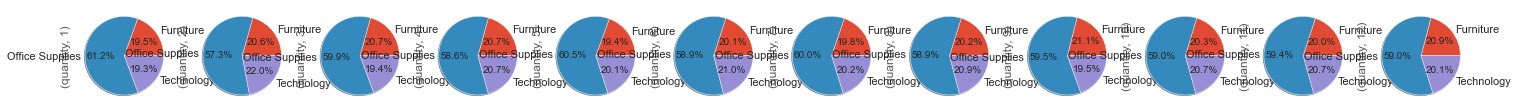

In [28]:
#Proportion of quantity sold in each category for each month
month_df = pd.DataFrame(date_df[["category","Month","quantity"]])
month_df = month_df.groupby(['category',"Month"]).mean().unstack() #Average quantities sold per day
print(month_df)
month_df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%', shadow = True,legend=False) #The explode might need to change depending on how many field u have

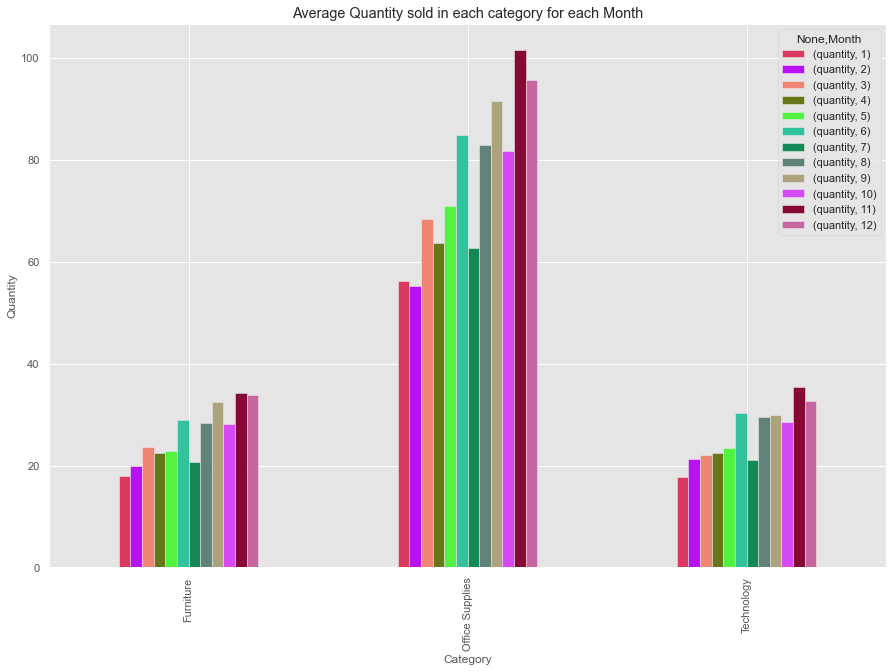

In [29]:
#Bar chart for actual quantity in each Month
plt.style.use('ggplot')

no_of_colors= 12
colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)]
month_df.plot.bar(legend=True, figsize=(15,10), color=colors) #note that the outside . is the 2nd group by variable ‘Married’
plt.title('Average Quantity sold in each category for each Month')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

The proportion of quantities within each category throughout each month on average remains relatively constant, with proportion of office supplies being slightly bigger proportion in Janurary.
Generally in Janurary, across all categories sell lesser quantities.

Across all categories, most quantity is sold in November, followed by December towards the end of the year. 

## Looking at Year and quantity sold within each category

                  quantity                                  
Year                  2011       2012       2013        2014
category                                                    
Furniture        19.902208  21.599407  28.783383   34.111111
Office Supplies  55.323615  65.353107  81.873596  102.566667
Technology       18.831804  23.466463  27.401180   34.976744


array([<AxesSubplot:ylabel='(quantity, 2011)'>,
       <AxesSubplot:ylabel='(quantity, 2012)'>,
       <AxesSubplot:ylabel='(quantity, 2013)'>,
       <AxesSubplot:ylabel='(quantity, 2014)'>], dtype=object)

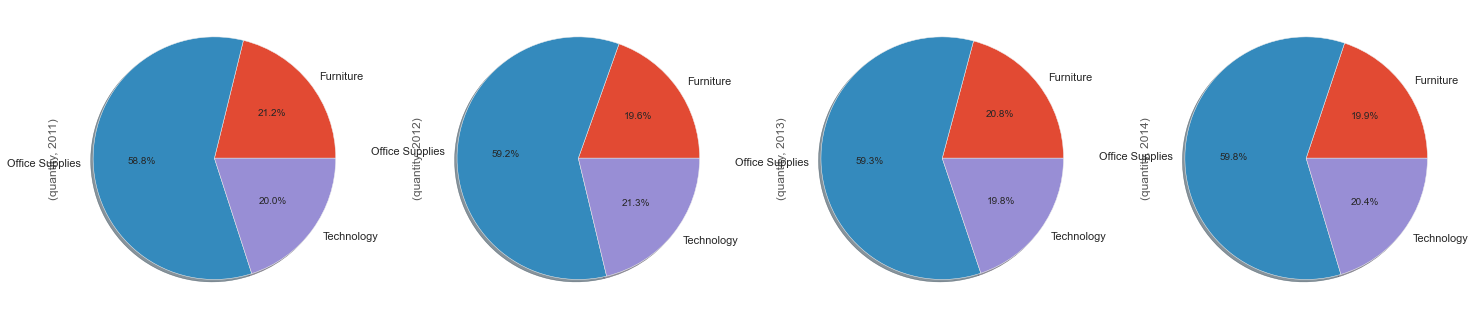

In [30]:
#Proportion of quantity sold in each category for each year
year_df = pd.DataFrame(date_df[["category","Year","quantity"]])
year_df = year_df.groupby(['category',"Year"]).mean().unstack() #Average quantities sold per day
print(year_df)
year_df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%', shadow = True,legend=False) #The explode might need to change depending on how many field u have

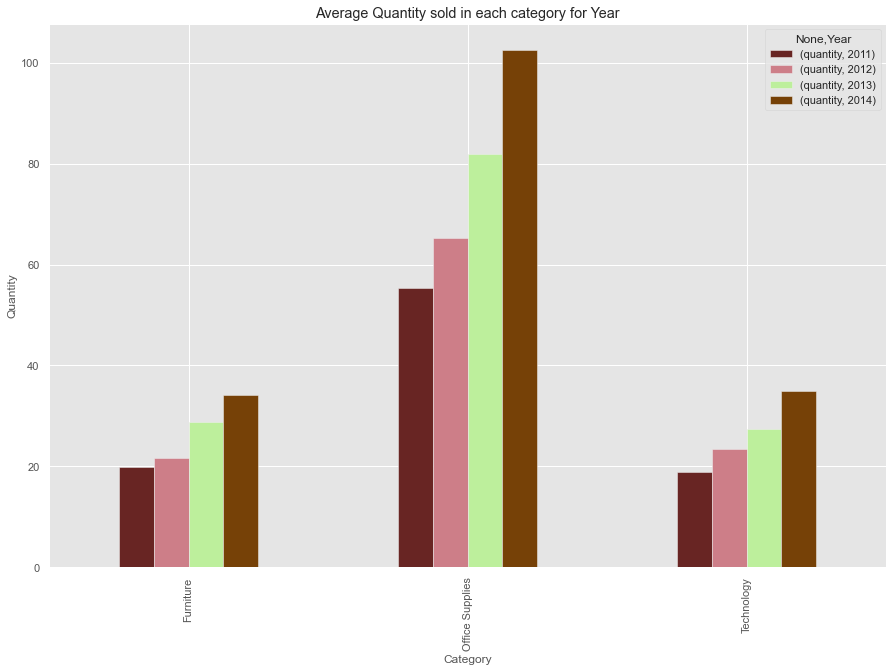

In [31]:
#Bar chart for actual quantity in each Year
plt.style.use('ggplot')

no_of_colors= 4
colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(no_of_colors)]
year_df.plot.bar(legend=True, figsize=(15,10), color=colors) #note that the outside . is the 2nd group by variable ‘Married’
plt.title('Average Quantity sold in each category for Year')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()

In [32]:
#Converting dataframe into desirable format for plotting in graph
new_year_df = year_df.unstack().reset_index()
new_year_df = new_year_df.drop(["level_0"], axis = 1) #drop column by name
new_year_df.rename(columns = {0: 'Average_Quantity'}, inplace = True)

In [33]:
new_year_df

,Year,category,Average_Quantity
0,2011,Furniture,19.902208
1,2011,Office Supplies,55.323615
2,2011,Technology,18.831804
3,2012,Furniture,21.599407
4,2012,Office Supplies,65.353107
5,2012,Technology,23.466463
6,2013,Furniture,28.783383
7,2013,Office Supplies,81.873596
8,2013,Technology,27.401180
9,2014,Furniture,34.111111


In [34]:
new_year_df.groupby("category")

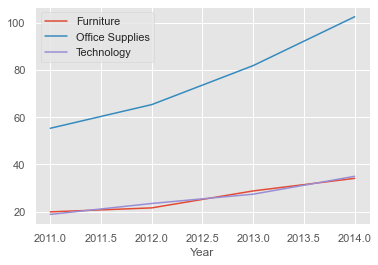

In [35]:
# Plot graph of each product category selling over each year
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in new_year_df.groupby("category"):
    data.plot(x='Year', y='Average_Quantity', ax=ax, label=key)

The trend is that generally, all product categories sell more as time goes by. The Furniture and Technology category seems to have almost the same linear trend, with the number of products sold being almost the same. 
The Office supplies category on the other hand seems to have an exponential growing trend across each year with more office suppliers getting sold at an increasing rate across the years. Additionally, office supplies seems to have more quantity sold as compared to the furniture and technology category.

# Part 4 is there any pattern with regard to how different product sub-categories sell to different markets?

[Text(0, 0, '11002 (21%)'),
 Text(0, 0, '10294 (20%)'),
 Text(0, 0, '10000 (19%)'),
 Text(0, 0, '9994 (19%)'),
 Text(0, 0, '5029 (10%)'),
 Text(0, 0, '4587 (9%)'),
 Text(0, 0, '384 (1%)')]

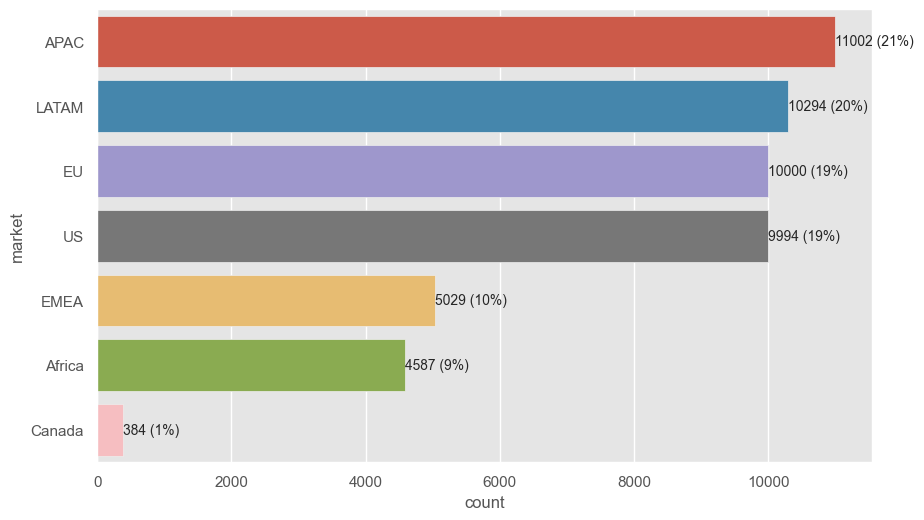

In [36]:
#Count plot of each market and orders placed
plt.figure(figsize=(10, 6), dpi=100) #Adjust the size of the plot

ax = sb.countplot(y=df['market'], order=df['market'].value_counts(ascending=False).index); #if want horizontal y=df['sub-category'], else vertical is x=df['sub-category']
abs_values = df['market'].value_counts(ascending=False).values
rel_values = df['market'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

In [37]:
market_df = df.groupby(["sub-category", "market"]).sum()

In [38]:
market_df = market_df.drop(["row_id","postal_code"], axis =1)

In [39]:
#Visualize sub categories and different markets in a table
market_df

sales  quantity  discount      profit  \
sub-category market                                                
Accessories  APAC    186235.2345      2620    128.78  15883.1145   
             Africa   42172.0920       484     28.00   6478.1820   
             Canada    4473.2100        42      0.00   1295.3100   
             EMEA     44164.1430       565     44.60   3583.3830   
             EU      163073.4630      1761     25.80  33441.5430   
...                          ...       ...       ...         ...   
Tables       Canada     849.3600         2      0.00    300.1800   
             EMEA     39333.9210       102      7.40   2764.2510   
             EU      105381.3765       339     33.45 -20998.4235   
             LATAM   144880.3280       628     58.10 -12305.8520   
             US      206965.5320      1241     83.35 -17725.4811   

                     shipping_cost  
sub-category market                 
Accessories  APAC         20488.49  
             Africa        4898.13  
             Canada         413.72  
             EMEA          4499.69  
             EU           16935.47  
...                            ...  
Tables       Canada         162.17  
             EMEA          5339.08  
             EU            8974.28  
             LATAM        15466.82  
             US           22314.05  

[119 rows x 5 columns]

In [40]:
#Get the list of subcategories
sub_category_list = list(df["sub-category"].unique())

In [41]:
len(sub_category_list)

17

In [42]:
4%2

0

/var/folders/sc/rjvtqltx46n430bjscf2vcgw0000gn/T/ipykernel_7462/3714075013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newer_df['market_column'] = newer_df.index
/var/folders/sc/rjvtqltx46n430bjscf2vcgw0000gn/T/ipykernel_7462/3714075013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newer_df['market_column'] = newer_df.index
/var/folders/sc/rjvtqltx46n430bjscf2vcgw0000gn/T/ipykernel_7462/3714075013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

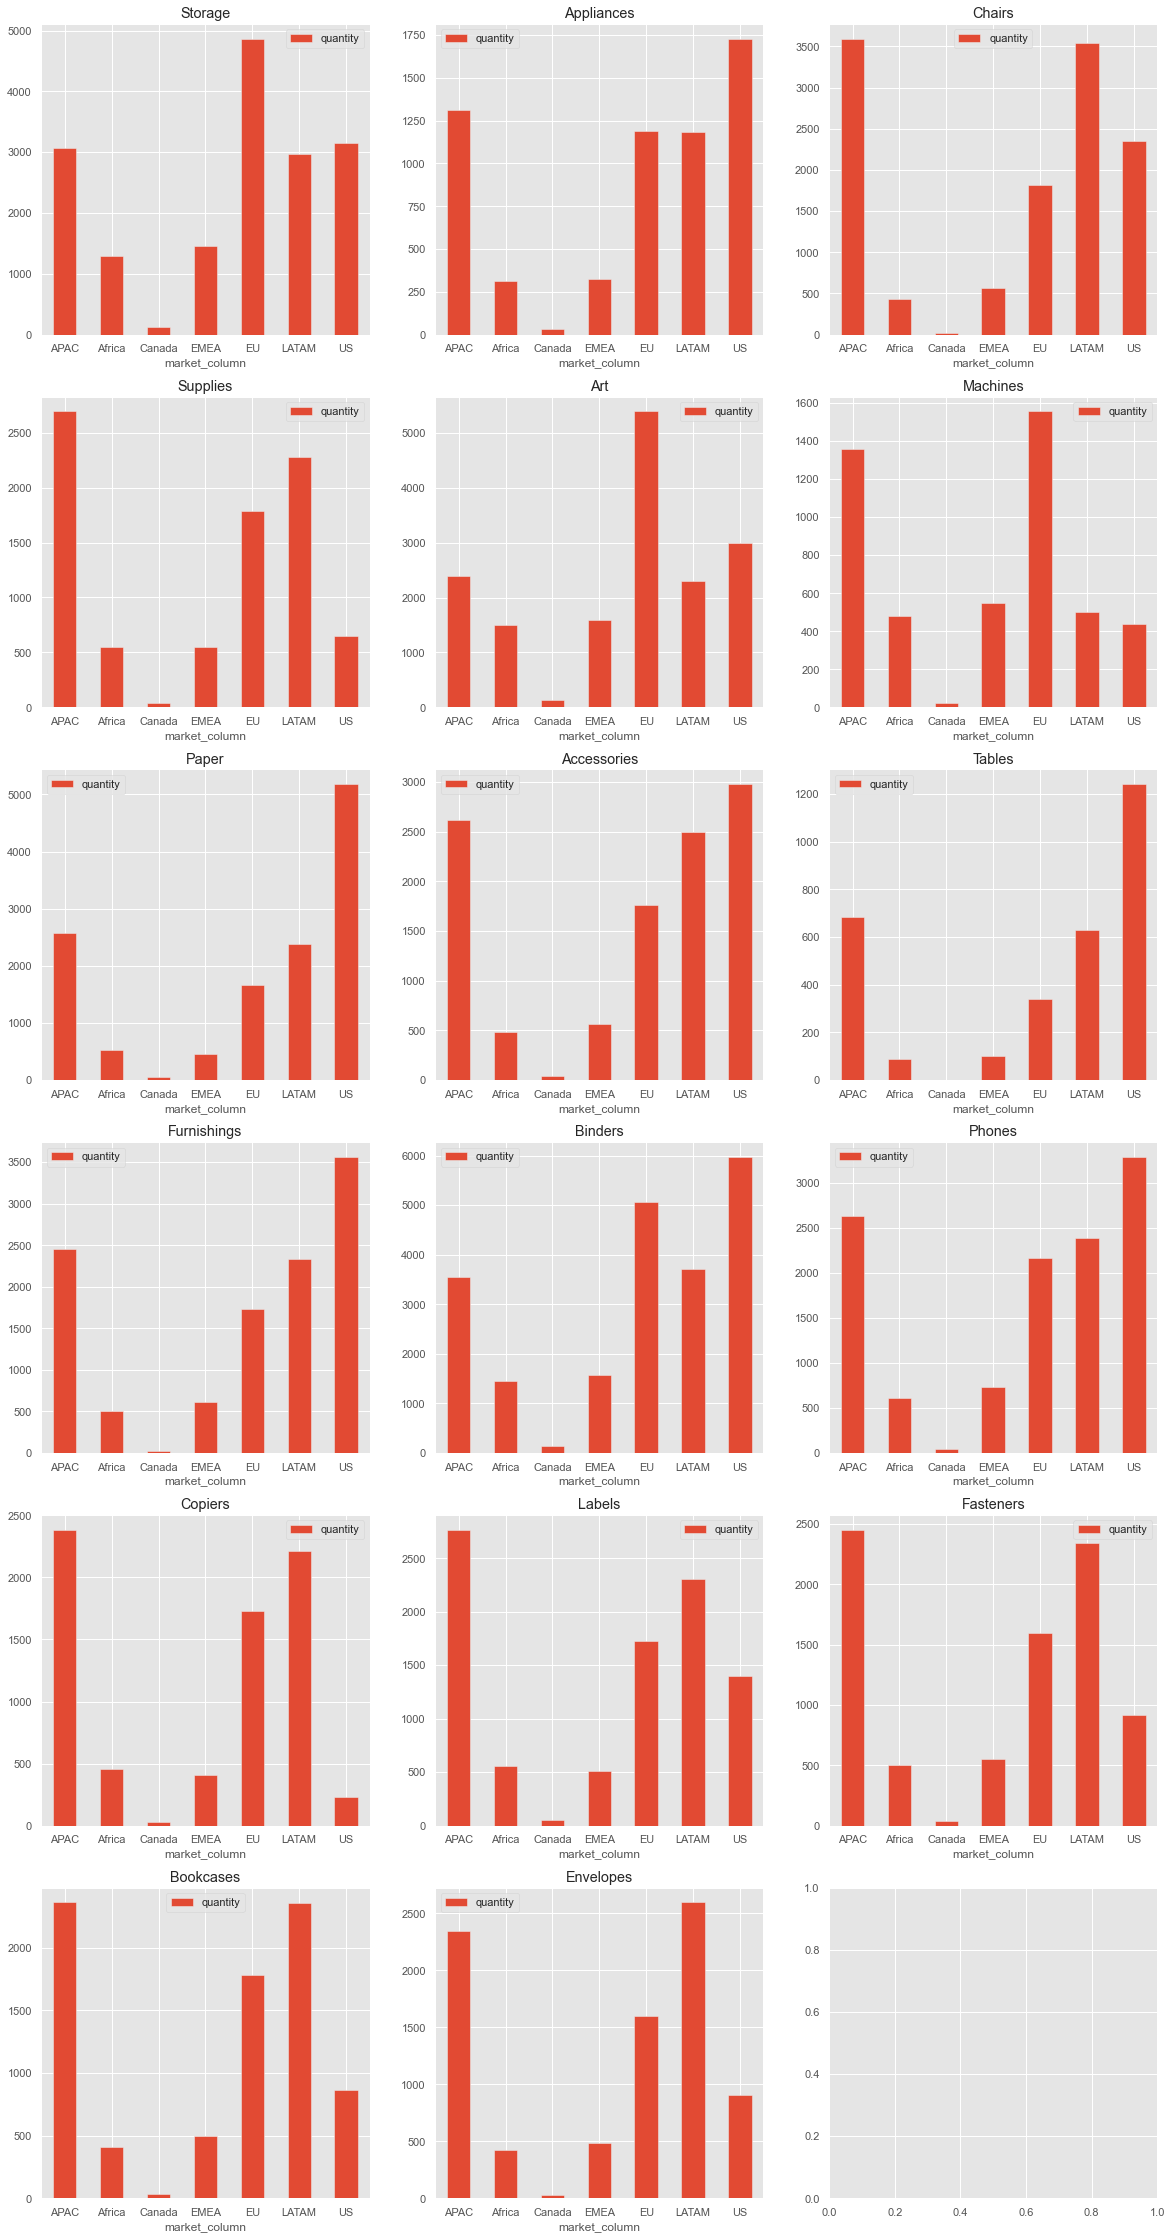

In [43]:
#Getting the bar chart for each subcategory and their respective regions
f, axes = plt.subplots(6, 3, figsize=(20, 40))
row = 0
col=0
for category in sub_category_list:
  if row%6==0 and row !=0:
    row =0
    col +=1
  newer_df = market_df.loc[category]
  newer_df['market_column'] = newer_df.index
  newer_df.plot.bar(x='market_column', y='quantity', rot=0 , title = category, ax=axes[row, col])
  row +=1

From the bar plots above, we can observe that the sub categories: Paper, Furnishing, Accessories, Tables, Phones and Chairs were mainly sold to US,APAC,LATAM region, with them ranking the top 3 regions in terms of quantities for these categories. These show that these regions might be having alot of offices, because they are purchasing categories of items required for office set up, such as chairs, tables, phone and furnishing.

For the Supplies, Copiers, Bookcases, Envelopes, Labels categories, they were mainly sold to APAC, LATAM, EU region with them ranking the top 3 regions in terms of quantities for these categories. This may show that these regions are in some form of printing business because all these sub categories are somewhat linked to each other.

For the Appliances, Art and Storage sub categories, US EU and APAC reegion sells the most. 

Lastly the top 3 regions for the remaining subcategories, 
Binders: US, EU LATAM
Machines: EU APAC, EMEA
Fasterners: APAC LATAM EU



In [44]:
#Converting dataframe into desirable format for plotting in Piechart
market_qty_df = pd.DataFrame(market_df["quantity"])
market_qty_df = market_qty_df.unstack().unstack().reset_index()
market_qty_df = market_qty_df.drop(["level_0"], axis = 1) #drop column by name
market_qty_df.rename(columns = {0: 'Quantity'}, inplace = True)
market_qty_df = market_qty_df.groupby(['sub-category',"market"]).sum().unstack(fill_value=0)
market_qty_df

Quantity                                      
market           APAC Africa Canada  EMEA    EU LATAM    US
sub-category                                               
Accessories      2620    484     42   565  1761  2498  2976
Appliances       1310    313     30   323  1187  1186  1729
Art              2397   1497    129  1590  5394  2294  3000
Binders          3541   1443    132  1570  5058  3711  5974
Bookcases        2361    407     32   500  1785  2357   868
Chairs           3594    437     24   568  1813  3544  2356
Copiers          2385    454     29   408  1733  2211   234
Envelopes        2344    425     25   486  1599  2595   906
Fasteners        2452    502     35   551  1597  2339   914
Furnishings      2460    500     20   610  1734  2338  3563
Labels           2767    556     49   511  1730  2309  1400
Machines         1357    479     25   549  1556   500   440
Paper            2568    532     54   449  1664  2377  5178
Phones           2631    614     46   737  2169  2384  3289
Storage          3061   1286    118  1452  4867  2975  3158
Supplies         2694    548     41   546  1787  2280   647
Tables            684     87      2   102   339   628  1241

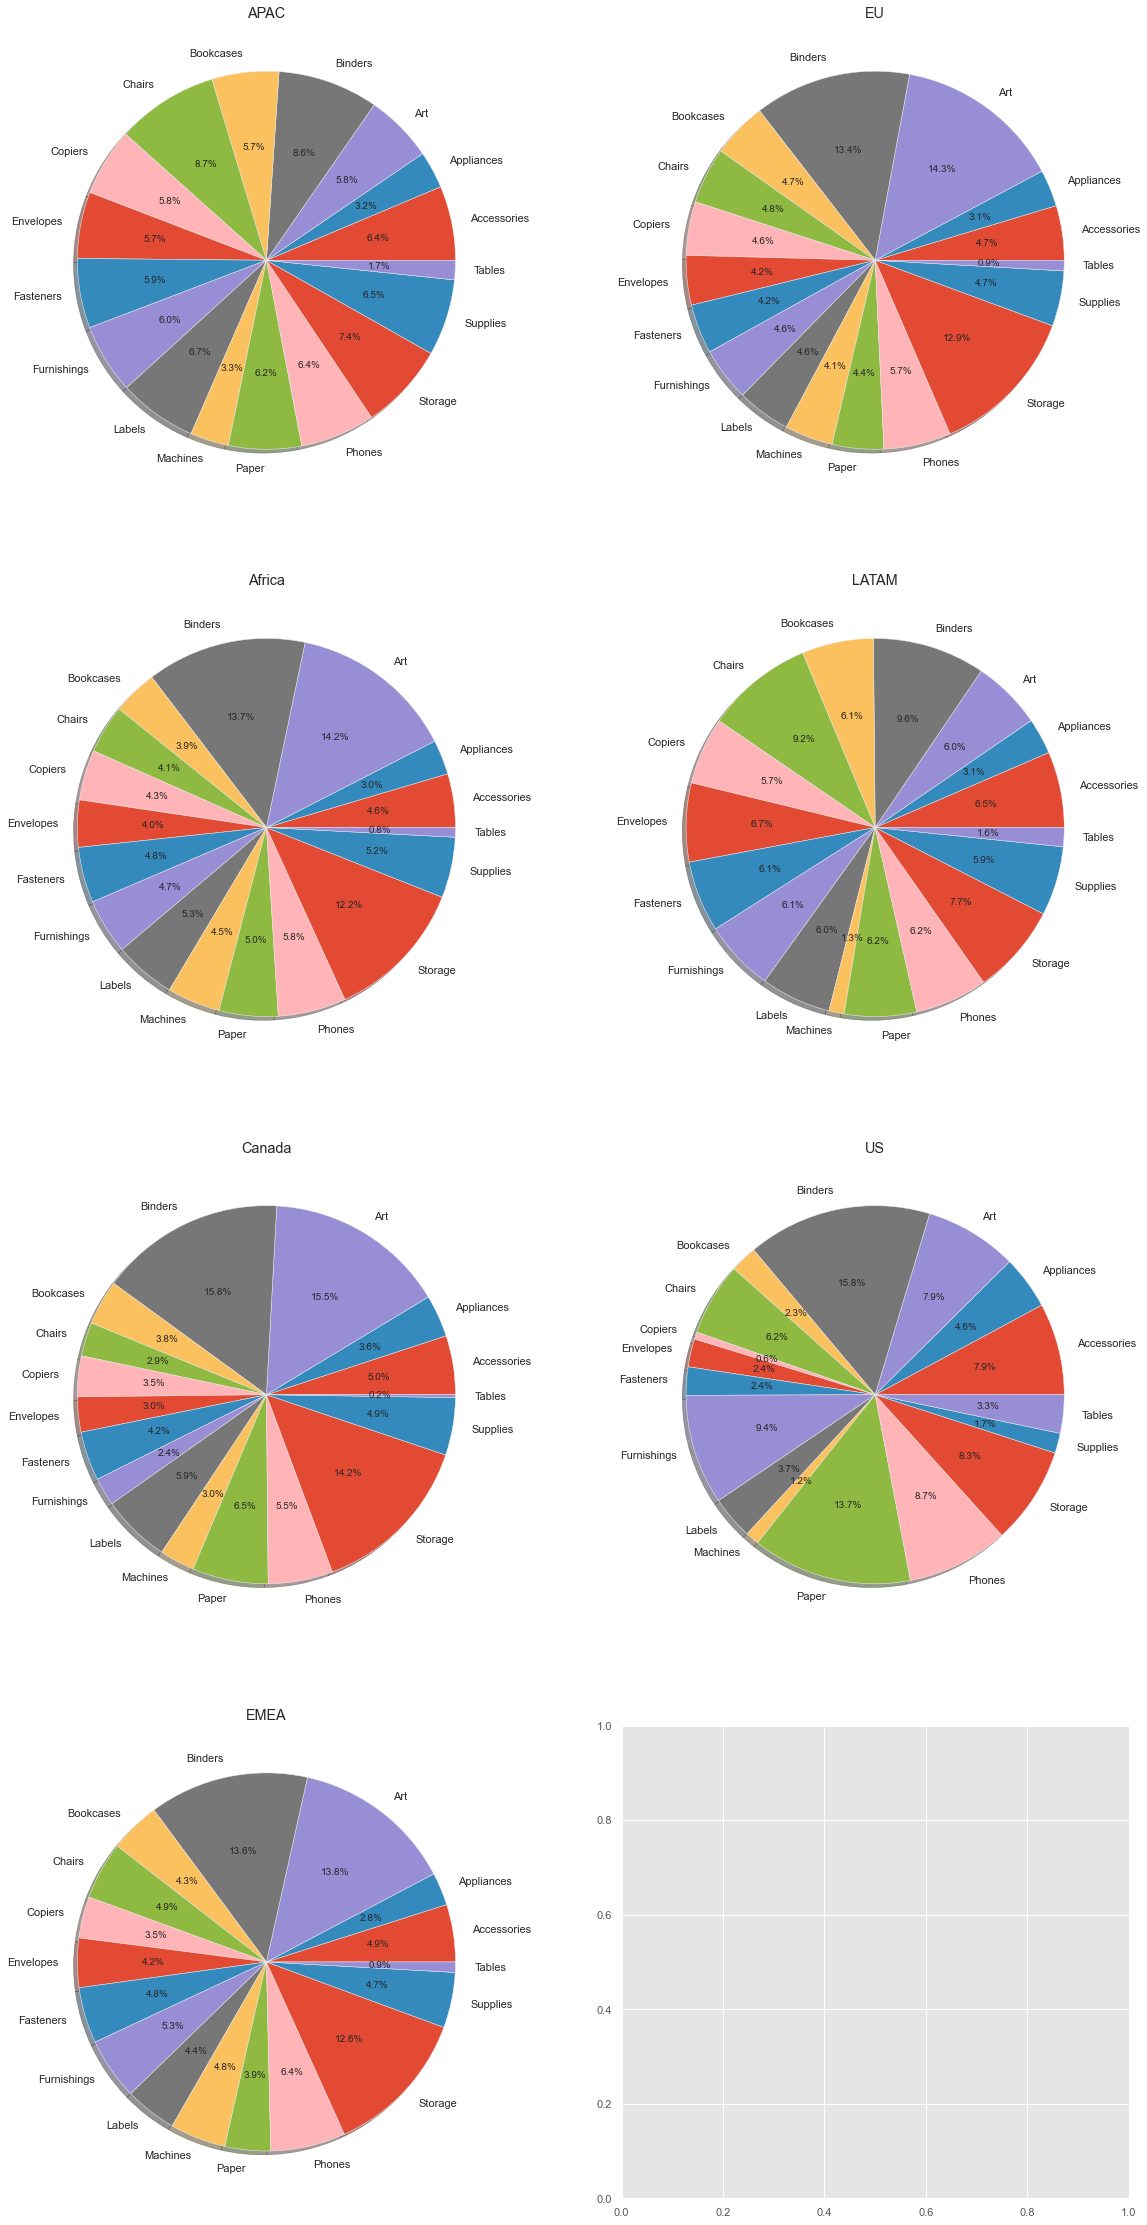

In [45]:
#Plot pie chart for each region
f, axes = plt.subplots(4, 2, figsize=(20, 40))

row = 0
col=0

for i in market_qty_df:
    if row%4==0 and row !=0:
      row =0
      col +=1
    market_qty_df.plot.pie(y=i,autopct='%1.1f%%', shadow = True,legend=False, ax=axes[row,col], title=i[1], ylabel = '') #ylabel = '' --> if you dont want the y labels
    row+=1

From the Pie Chart, in Descending ranking of order for Top 3 sub-category per region:
- APAC: Chair, Binder, Storage
- EU: Art, Binder, Storage
- Africa: Art, Binder Storage
- LATAM: Binder, Chair, Storage
- Canada: Binder, Art, Storage
- US: Binder, Paper, Furnishing
- EMEA: Art, Binder, Storage

EU, Africa, EMEA have the same top 3 rankings for sub-categories. Binder is significantly sold in every region, followed by Storage.
